#  Hotel Reservations Management
Create a problem statement
identify the data you want to analyze.
explore and clean the data
analyze the data to get useful insights
present the data in terms of reports or dashboards using visualization.

In recent years, city hotel and resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result ,including fewer revenues and less ideal hotel room used. consequently, lowering cancellation rates in both hotels primary goal in order to increase their efficiency in generating revenue and for us to offer thorough business advice to address this problem
The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

# import the relavant modules

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the CSV data set

In [2]:
# read the csv file
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\Datasets\\hotel_booking.csv")

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()#df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.drop('name',axis=1, inplace=True)

In [6]:
df.drop('meal',axis=1, inplace=True)

In [7]:
columns_to_drop = ['email','credit_card','phone-number']
df.drop(columns_to_drop,axis=1, inplace=True)

In [8]:
df.shape

(119390, 31)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [10]:
df.info()   # to know data types and all non null and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  country         

In [11]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])  

In [12]:
df['arrival_date_year']=pd.to_datetime(df['arrival_date_year'])

In [13]:
df.info()   # object form  date column should be in datetime format type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  datetime64[ns]
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [14]:
df.describe(include='object')       # returning only object columns

,hotel,arrival_date_month,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,177,8,5,10,12,3,4,3
top,City Hotel,August,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,48590,56477,97870,85994,74053,104641,89613,75166


In [15]:
for col in df.describe(include='object').columns:        # filtering data object and getting unique values
    print(col)
    print(df[col].unique())
    print('*'*15)

hotel
['Resort Hotel' 'City Hotel']
***************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
***************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND

In [16]:
# checking for missing values
df.isnull().sum()         # returns total missing values with coulumns name

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [17]:
# dropping agent and company 
df.drop(['company','agent'],axis=1,inplace=True)# give axis=1 to remove column,axis=0 to remove row 


#rows with the missing values use dropna

df.dropna(inplace= True)

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

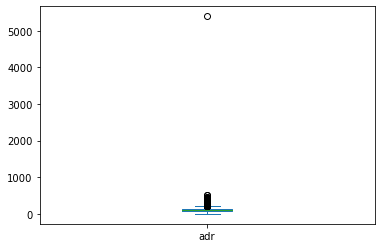

In [20]:
#graph to see outliers


df['adr'].plot(kind='box')

In [21]:
# removing outliers of the adr data
df=df[df['adr']<1000]

<AxesSubplot:>

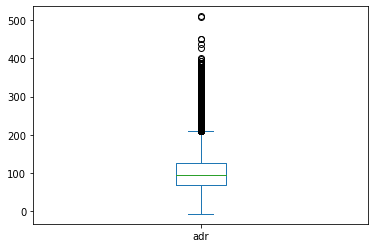

In [22]:
df['adr'].plot(kind='box')

In [23]:
df=df[df[df['adr']<1000]['adr']>10]

<AxesSubplot:>

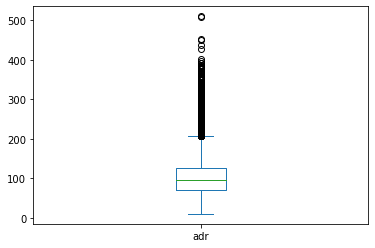

In [24]:
df['adr'].plot(kind='box')

# data analysis and visualizations


In [25]:
cancelled_hotel_percent=df['is_canceled'].value_counts(normalize=True)
print(cancelled_hotel_percent)

0    0.624354
1    0.375646
Name: is_canceled, dtype: float64


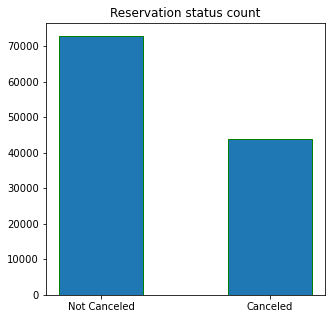

In [26]:
#visualise reservation status count for cancelled and not cancelled data  

plt.figure(figsize=(5,5))
plt.title('Reservation status count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='g',width=0.50)
plt.show()

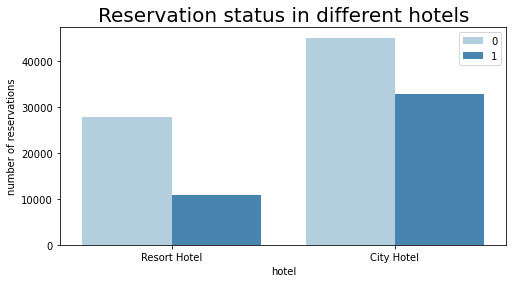

In [27]:
#lets see which hotels cancellation is more we use count plot

plt.figure(figsize=(8, 4))
axl = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels, _ = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()

In [28]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.717981
1    0.282019
Name: is_canceled, dtype: float64

In [29]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.577893
1    0.422107
Name: is_canceled, dtype: float64

In [30]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

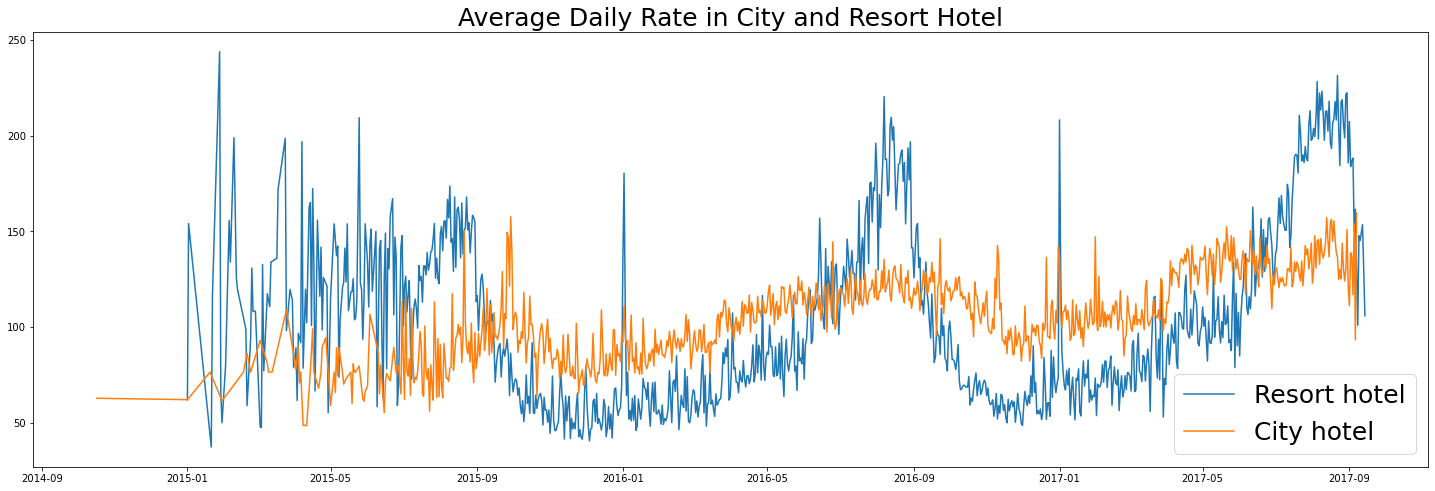

In [31]:
# exploring if prices are the reasons for the cancellation of hotel

plt.figure(figsize = (25,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 25)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City hotel')
plt.legend(fontsize =25)
plt.show()

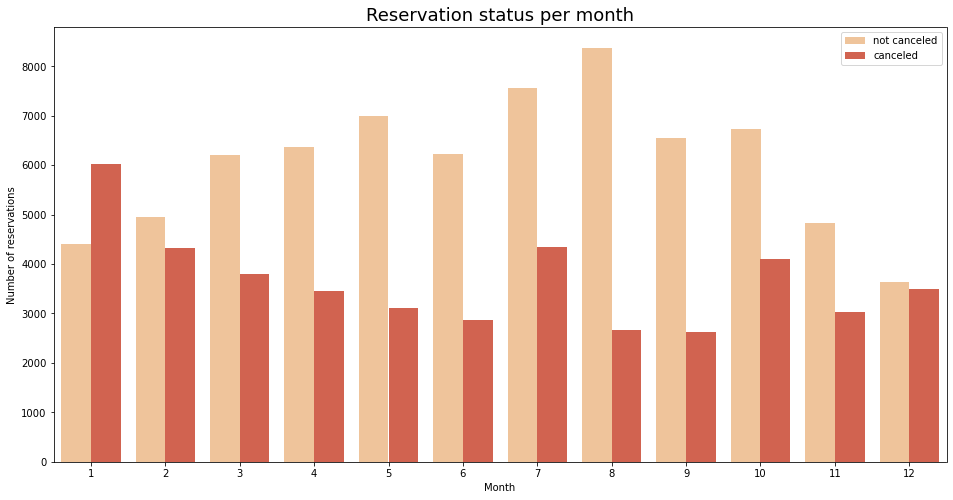

In [32]:
df['month'] =df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
axl = sns.countplot(x = 'month', hue = 'is_canceled',data = df,palette = 'OrRd')
legend_labels,_ = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 18)
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

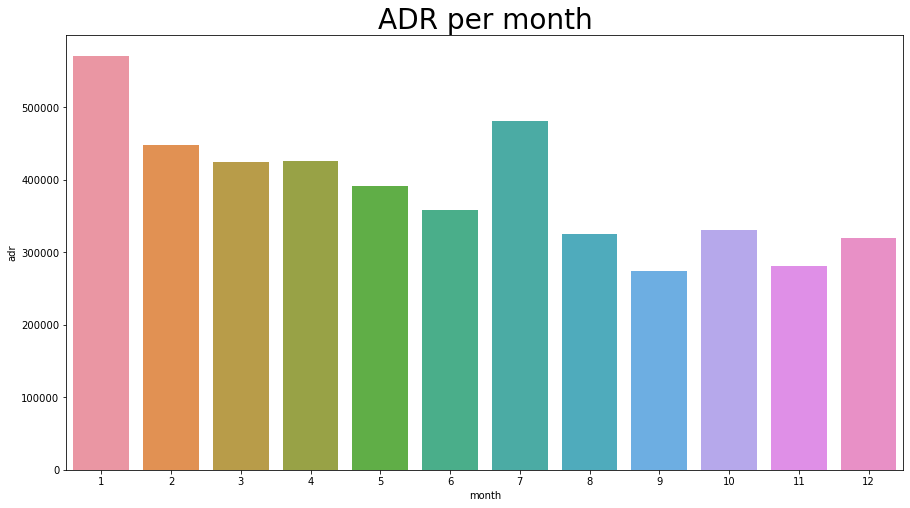

In [33]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize= 28)
sns.barplot('month','adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index() )
plt.show()

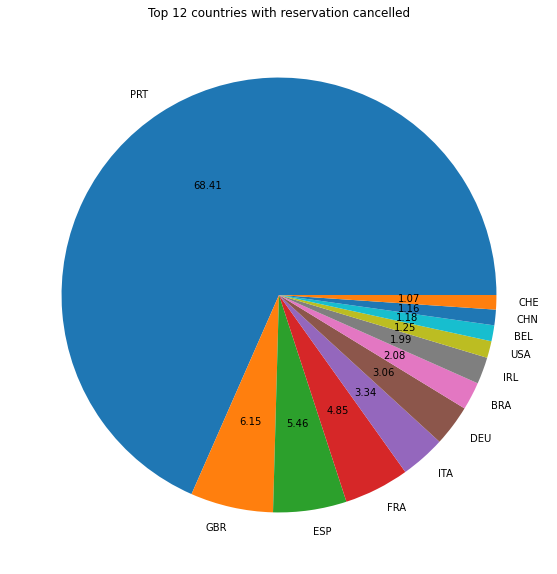

In [34]:
cancelled_data = df[df['is_canceled'] == 1]
top_12_countries=cancelled_data['country'].value_counts()[:12]
plt.figure(figsize=(10,10))
plt.title('Top 12 countries with reservation cancelled')
plt.pie(top_12_countries, autopct = '%.2f', labels = top_12_countries.index)
plt.show()


In [35]:
df['market_segment'].value_counts()

Online TA        55989
Offline TA/TO    23792
Groups           19467
Direct           12159
Corporate         5022
Aviation           231
Complementary       35
Name: market_segment, dtype: int64

In [36]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.479789
Offline TA/TO    0.203882
Groups           0.166819
Direct           0.104195
Corporate        0.043035
Aviation         0.001980
Complementary    0.000300
Name: market_segment, dtype: float64

In [37]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.472374
Groups           0.273930
Offline TA/TO    0.187722
Direct           0.042568
Corporate        0.022151
Aviation         0.001163
Complementary    0.000091
Name: market_segment, dtype: float64

<function matplotlib.pyplot.legend(*args, **kwargs)>

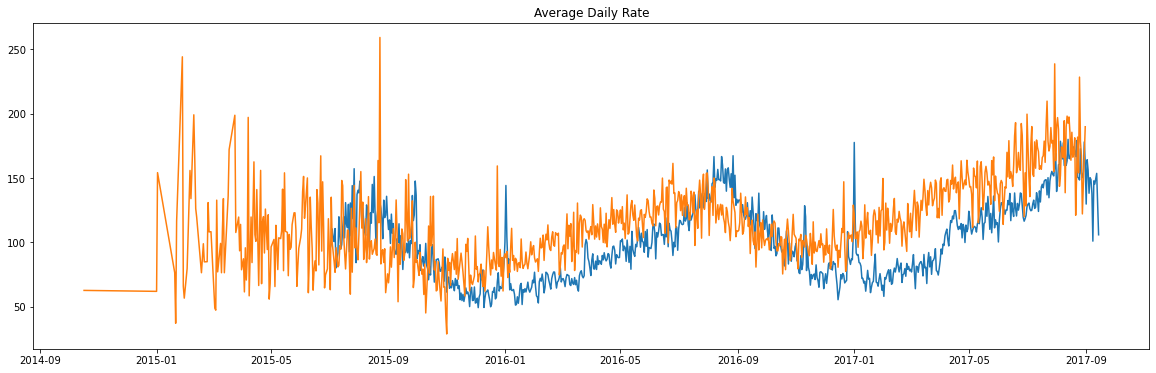

In [38]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace =True)
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

not_cancelled_data= df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace =True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not_cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend

In [39]:
# to remove data inconsistency
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]


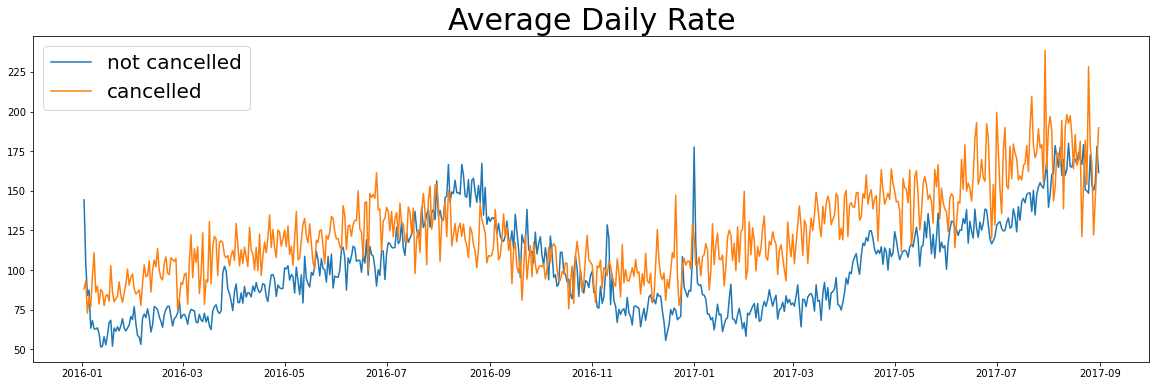

In [40]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

In [41]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

NameError: name 'custdata' is not defined